In [1]:
from orbit import Orbit, AU2km, mu, day2s
import elements as el
import angles as an
from lambert_izzo import lambert as lambert_izzo

from lambert import lambert as lambert_bate

import sys

import numpy as np
from numpy.linalg import norm
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
df = pd.read_csv('../gtoc4_problem_data.txt', skiprows=2,delimiter= '\s+',header=None)
df.columns = ['Name','Epoch','a','e','i','LAN','omega','M0']
df.head()

,Name,Epoch,a,e,i,LAN,omega,M0
0,'1580',54800.0,2.196803,0.487683,52.090794,62.324795,159.539839,3.521687
1,'1620',54800.0,1.245551,0.335511,13.337693,337.266017,276.806539,136.950031
2,'1943',54800.0,1.430317,0.255816,8.704065,246.401915,338.253875,288.405238
3,'2061',54800.0,2.264953,0.537119,3.770822,207.654108,156.432028,46.995497
4,'2135',54800.0,1.599572,0.503268,23.054312,191.262849,290.838892,256.724981


In [3]:
asteroids = set()

In [4]:
df.iloc[0]

Name       '1580'
Epoch       54800
a          2.1968
e        0.487683
i         52.0908
LAN       62.3248
omega      159.54
M0        3.52169
Name: 0, dtype: object

In [5]:
[*df.iloc[0]]

["'1580'",
 54800.0,
 2.1968033753931695,
 0.4876831067819973,
 52.09079390385544,
 62.32479511597435,
 159.53983855505257,
 3.5216868177911254]

In [6]:
for i in range(len(df)):
    o = Orbit(name=df.iloc[i].Name)
    o.from_gtoc(*df.iloc[i])
    asteroids.add(o)

In [7]:
print(o.details())

Orbit: '6344P-L'
 Epoch     :  54800.0
 a         :  2.80410817 AU
 e         :  0.66708346
 inc       :  4.72681220 deg
 LAN       :  183.61177196 deg
 argp      :  234.06965519 deg
 meanAnom0 :  79.37913845 deg
 trueAnom0 :  147.76999611 deg
 h         :  5560417068.38247395 km2/s
 r0        :  [-3.22550105 -1.53048387 0.10949722] AU
 v0        :  [-3.20094406 -12.99547743 1.05573793] km/s


In [8]:
asteroids;

In [9]:
for ast in asteroids:
    print("**  **  **")
    print(ast.details())

**  **  **
Orbit: '2002FB6'
 Epoch     :  54800.0
 a         :  1.79647609 AU
 e         :  0.54493341
 inc       :  33.70223562 deg
 LAN       :  182.82085814 deg
 argp      :  101.77592201 deg
 meanAnom0 :  254.48545404 deg
 trueAnom0 :  208.66593751 deg
 h         :  5009180800.27418518 km2/s
 r0        :  [-1.64344506 1.45324986 -1.02204908] AU
 v0        :  [-5.43970330 -12.12868312 7.90115482] km/s
**  **  **
Orbit: '2002FW5'
 Epoch     :  54800.0
 a         :  1.31497053 AU
 e         :  0.21771814
 inc       :  46.44431137 deg
 LAN       :  21.77561836 deg
 argp      :  85.42704348 deg
 meanAnom0 :  221.63785299 deg
 trueAnom0 :  208.00187393 deg
 h         :  4988576721.86201763 km2/s
 r0        :  [0.93631439 -0.68175327 -1.03117279] AU
 v0        :  [14.48458856 13.97767933 8.00041026] km/s
**  **  **
Orbit: '2002FW1'
 Epoch     :  54800.0
 a         :  0.82335035 AU
 e         :  0.34201547
 inc       :  6.59264182 deg
 LAN       :  164.14644485 deg
 argp      :  223.141040

Orbit: '2007YQ56'
 Epoch     :  54800.0
 a         :  1.14064147 AU
 e         :  0.28792074
 inc       :  26.45730770 deg
 LAN       :  276.07463862 deg
 argp      :  273.01929120 deg
 meanAnom0 :  201.54034442 deg
 trueAnom0 :  192.51567811 deg
 h         :  4558762258.88287258 km2/s
 r0        :  [1.20680147 0.52033778 0.62459722] AU
 v0        :  [-8.63040113 18.87046691 -3.27703260] km/s
**  **  **
Orbit: '2007YR56'
 Epoch     :  54800.0
 a         :  2.01237996 AU
 e         :  0.51576918
 inc       :  10.32824699 deg
 LAN       :  97.60386523 deg
 argp      :  336.12465526 deg
 meanAnom0 :  122.44385104 deg
 trueAnom0 :  157.38142887 deg
 h         :  5417031623.34902859 km2/s
 r0        :  [-1.73721374 -2.19004952 0.36661835] AU
 v0        :  [6.85387679 -11.85217659 -0.95225742] km/s
**  **  **
Orbit: '2007YT56'
 Epoch     :  54800.0
 a         :  1.29459267 AU
 e         :  0.28766213
 inc       :  5.99899915 deg
 LAN       :  302.56583850 deg
 argp      :  81.66273946 deg
 m

 v0        :  [-13.11615305 -23.71778029 1.07459348] km/s
**  **  **
Orbit: '164216'
 Epoch     :  54800.0
 a         :  2.15350009 AU
 e         :  0.56396265
 inc       :  19.89511929 deg
 LAN       :  295.28371672 deg
 argp      :  326.17044987 deg
 meanAnom0 :  156.68739933 deg
 trueAnom0 :  172.06446383 deg
 h         :  5401459339.34446716 km2/s
 r0        :  [0.82423994 3.13361437 0.75407023] AU
 v0        :  [-9.48983720 5.08518643 -2.31935773] km/s
**  **  **
Orbit: '2006DS62'
 Epoch     :  54800.0
 a         :  2.26308413 AU
 e         :  0.56909730
 inc       :  1.88423935 deg
 LAN       :  153.44181142 deg
 argp      :  38.22979020 deg
 meanAnom0 :  283.89104519 deg
 trueAnom0 :  222.21397437 deg
 h         :  5513514527.35697842 km2/s
 r0        :  [1.55832543 2.13547066 -0.08576107] AU
 v0        :  [-16.67221329 0.77519835 0.22241886] km/s
**  **  **
Orbit: '164217'
 Epoch     :  54800.0
 a         :  2.01310719 AU
 e         :  0.41593156
 inc       :  48.89984284 deg
 

 v0        :  [-21.43347586 10.11539507 0.92960640] km/s
**  **  **
Orbit: '2008KS'
 Epoch     :  54800.0
 a         :  0.97453673 AU
 e         :  0.15680203
 inc       :  25.49168375 deg
 LAN       :  246.09873295 deg
 argp      :  152.76625579 deg
 meanAnom0 :  47.86538376 deg
 trueAnom0 :  63.01209860 deg
 h         :  4345672877.08712769 km2/s
 r0        :  [-0.13646589 0.84796569 -0.22329688] AU
 v0        :  [-30.30586071 -3.70198604 -12.49546613] km/s
**  **  **
Orbit: '2008LB'
 Epoch     :  54800.0
 a         :  2.45614248 AU
 e         :  0.60877918
 inc       :  4.31957609 deg
 LAN       :  80.08742900 deg
 argp      :  211.73984386 deg
 meanAnom0 :  37.87195859 deg
 trueAnom0 :  110.50137009 deg
 h         :  5541784142.33857250 km2/s
 r0        :  [1.44918678 1.32363806 -0.09061772] AU
 v0        :  [-2.57397244 23.12167693 0.49216688] km/s
**  **  **
Orbit: '2008LD'
 Epoch     :  54800.0
 a         :  0.89185219 AU
 e         :  0.15463134
 inc       :  6.54205742 deg
 LA

Orbit: '2005AD3'
 Epoch     :  54800.0
 a         :  2.40810780 AU
 e         :  0.50008434
 inc       :  14.55325610 deg
 LAN       :  294.59474650 deg
 argp      :  277.15412506 deg
 meanAnom0 :  330.41510924 deg
 trueAnom0 :  279.31793681 deg
 h         :  5989737645.15929985 km2/s
 r0        :  [-1.08366731 1.26587111 -0.11903056] AU
 v0        :  [-10.29488087 -23.71241910 -4.99226911] km/s
**  **  **
Orbit: '2005AU3'
 Epoch     :  54800.0
 a         :  1.24642750 AU
 e         :  0.47363917
 inc       :  3.77987311 deg
 LAN       :  105.13210996 deg
 argp      :  266.73457593 deg
 meanAnom0 :  329.21760828 deg
 trueAnom0 :  281.27269272 deg
 h         :  4382626897.75684071 km2/s
 r0        :  [0.34747301 -0.81376579 -0.00812592] AU
 v0        :  [24.83138129 25.91817699 -2.03065271] km/s
**  **  **
Orbit: '2005BC'
 Epoch     :  54800.0
 a         :  1.18977016 AU
 e         :  0.27801671
 inc       :  30.12452051 deg
 LAN       :  292.51218227 deg
 argp      :  84.17738335 deg
 

 v0        :  [7.72996963 -11.08209074 0.44528782] km/s
**  **  **
Orbit: '2003UR12'
 Epoch     :  54800.0
 a         :  2.43133465 AU
 e         :  0.56816716
 inc       :  60.46870576 deg
 LAN       :  194.03321969 deg
 argp      :  122.35743660 deg
 meanAnom0 :  137.34484141 deg
 trueAnom0 :  165.32061028 deg
 h         :  5719262203.34216499 km2/s
 r0        :  [-1.49330162 1.39639228 -3.03060524] AU
 v0        :  [-10.64552554 -2.65589526 -0.00837305] km/s
**  **  **
Orbit: '2003UX26'
 Epoch     :  54800.0
 a         :  1.15474565 AU
 e         :  0.36530848
 inc       :  4.54472613 deg
 LAN       :  35.36829546 deg
 argp      :  263.98179114 deg
 meanAnom0 :  91.27795587 deg
 trueAnom0 :  129.65232969 deg
 h         :  4458651602.27525234 km2/s
 r0        :  [0.46886752 1.21631564 0.05726639] AU
 v0        :  [-18.26782772 15.93465590 1.87334293] km/s
**  **  **
Orbit: '2003UX34'
 Epoch     :  54800.0
 a         :  1.09521871 AU
 e         :  0.61569793
 inc       :  2.56636511 d

**  **  **
Orbit: '2007VG3'
 Epoch     :  54800.0
 a         :  3.29369804 AU
 e         :  0.69395366
 inc       :  10.95047274 deg
 LAN       :  215.41015656 deg
 argp      :  174.85597570 deg
 meanAnom0 :  66.10232595 deg
 trueAnom0 :  143.61648909 deg
 h         :  5824382355.77250004 km2/s
 r0        :  [-3.82006186 0.37425171 -0.48728140] AU
 v0        :  [-10.41160650 -8.97958830 0.24878827] km/s
**  **  **
Orbit: '2007VH3'
 Epoch     :  54800.0
 a         :  1.97069009 AU
 e         :  0.43319999
 inc       :  2.91909582 deg
 LAN       :  120.31928204 deg
 argp      :  345.13315395 deg
 meanAnom0 :  116.05725525 deg
 trueAnom0 :  150.06087493 deg
 h         :  5639506698.15112495 km2/s
 r0        :  [-0.63912280 -2.48032210 0.09198026] AU
 v0        :  [12.95093489 -8.60745206 -0.34849853] km/s
**  **  **
Orbit: '2007VH186'
 Epoch     :  54800.0
 a         :  1.57405504 AU
 e         :  0.19699307
 inc       :  19.23984794 deg
 LAN       :  51.53258328 deg
 argp      :  15.0627

In [10]:
sys.getsizeof(asteroids)

131296

In [11]:
o.rv(epoch=55000)

(array([-4.86888672e+08, -4.23182566e+08,  3.23856856e+07]),
 array([ 2.22951025, -9.44366981,  0.79092257]))

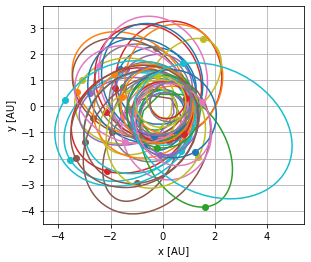

In [12]:
fig = plt.figure()
ax = plt.gca()
for i in range(50):
    o = asteroids.pop() #remove el
    asteroids.add(o) # place back into the set
    o.plot(num=50)

plt.grid()
ax.set_aspect(aspect=1)

In [13]:
len(asteroids)

1436

In [14]:
# create Earth
earth = Orbit(name='Earth')
earth.from_gtoc('Earth',54000,0.999988049532578, 1.671681163160e-2, 0.8854353079654e-3, 175.40647696473, 287.61577546182, 257.60683707535)
print(earth.details())

Orbit: Earth
 Epoch     :  54000
 a         :  0.99998805 AU
 e         :  0.01671681
 inc       :  0.00088544 deg
 LAN       :  175.40647696 deg
 argp      :  287.61577546 deg
 meanAnom0 :  257.60683708 deg
 trueAnom0 :  255.74455168 deg
 h         :  4456566001.94500351 km2/s
 r0        :  [1.00360834 -0.02160433 -0.00000091] AU
 v0        :  [0.15588657 29.66001209 -0.00045708] km/s


In [15]:
o=asteroids.pop()   # take random asteroid
asteroids.add(o)
print(o.details())

Orbit: '2002WP'
 Epoch     :  54800.0
 a         :  1.44983988 AU
 e         :  0.21591939
 inc       :  19.15205651 deg
 LAN       :  76.37420823 deg
 argp      :  1.02091141 deg
 meanAnom0 :  145.10691739 deg
 trueAnom0 :  156.60791072 deg
 h         :  5240302979.75995255 km2/s
 r0        :  [-0.97789920 -1.40324970 0.21525558] AU
 v0        :  [14.18732644 -13.45738780 -5.88960232] km/s


In [16]:
# for each launch
launch_step = 10
earliest_launch_date = 57023
latest_launch_date = 61041+10
earliest_launch_date = 58500
latest_launch_date = 59000

launch_dates = np.arange(earliest_launch_date, latest_launch_date, step=launch_step) # in MJD

launch_dates

array([58500, 58510, 58520, 58530, 58540, 58550, 58560, 58570, 58580,
       58590, 58600, 58610, 58620, 58630, 58640, 58650, 58660, 58670,
       58680, 58690, 58700, 58710, 58720, 58730, 58740, 58750, 58760,
       58770, 58780, 58790, 58800, 58810, 58820, 58830, 58840, 58850,
       58860, 58870, 58880, 58890, 58900, 58910, 58920, 58930, 58940,
       58950, 58960, 58970, 58980, 58990])

In [17]:
# test lambert for one asteroid at initial time
r_earth, v_earth = earth.rv(epoch = earliest_launch_date)
r_ast, v_ast = o.rv(epoch=earliest_launch_date+60)

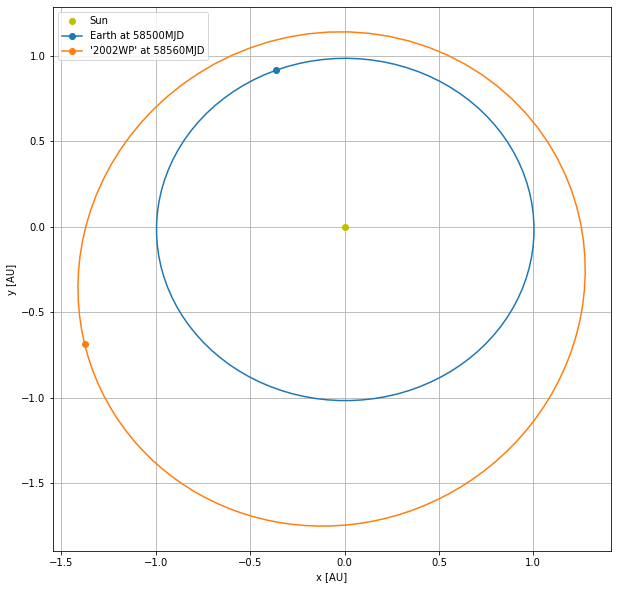

In [18]:
fig = plt.figure(figsize=(10,10))
plt.plot(0,0,'oy',label='Sun')
earth.plot(start=earliest_launch_date)
o.plot(start=earliest_launch_date + 60)
plt.legend()
plt.grid()

In [19]:
norm(r_earth)/AU2km

0.9834603057830545

In [20]:
try:
    # use Lambert formulation by izzo by default
    v1, v2 = lambert_izzo(o.mu, r_earth, r_ast,tof=60*day2s, M=0, return_='short')
except:
    # use Bate Lambert formulation if izzo fails
    v1, v2 = lambert_bate(o.mu, r_earth, r_ast, tof=60*day2s, grade='pro')
    print('Used Bate-lambert')

In [21]:
# check both methods
v1izzo, v2izzo = lambert_izzo(o.mu, r_earth, r_ast,tof=60*day2s, M=0, return_='short')
print(f'{v1izzo},{v2izzo}')
v1bate, v2bate = lambert_bate(o.mu, r_earth, r_ast, tof=60*day2s, grade='pro')
print(f'{v1bate},{v2bate}')

[-41.26207935 -37.92035918  13.97045509],[-19.02355208 -46.88063438   9.35104081]
[-41.26207935 -37.92035918  13.97045509],[-19.02355208 -46.88063438   9.35104081]


/Users/Devansh/Documents/GitHub/reGTOC04/jupyternotebooks/lambert.py:117: RuntimeWarning: invalid value encountered in power
  residue = np.power(_y_538(r1,r2,A,z)/_Stumpff_C(z), 3/2) * _Stumpff_S(z) + A*np.sqrt(_y_538(r1,r2,A,z)) - np.sqrt(mu)*tof
/Users/Devansh/Documents/GitHub/reGTOC04/jupyternotebooks/lambert.py:117: RuntimeWarning: invalid value encountered in sqrt
  residue = np.power(_y_538(r1,r2,A,z)/_Stumpff_C(z), 3/2) * _Stumpff_S(z) + A*np.sqrt(_y_538(r1,r2,A,z)) - np.sqrt(mu)*tof
/Users/Devansh/Documents/GitHub/reGTOC04/jupyternotebooks/lambert.py:122: RuntimeWarning: invalid value encountered in power
  Fdot = np.power(_y_538(r1,r2,A,z)/_Stumpff_C(z), 1.5) * (((1/(2*z)) * (_Stumpff_C(z) - 3*_Stumpff_S(z)/(2*_Stumpff_C(z)))) + 3*np.power(_Stumpff_S(z),2)/(4*_Stumpff_C(z))) + (A/8)*(3*_Stumpff_S(z)*np.sqrt(_y_538(r1,r2,A,z))/_Stumpff_C(z) + A*np.sqrt(_Stumpff_C(z)/_y_538(r1,r2,A,z)))
/Users/Devansh/Documents/GitHub/reGTOC04/jupyternotebooks/lambert.py:122: RuntimeWarning: in

In [22]:
v1, v2

(array([-41.26207935, -37.92035918,  13.97045509]),
 array([-19.02355208, -46.88063438,   9.35104081]))

In [23]:
o_trx = Orbit(name='trx1')  # trajectory object

In [24]:
o_trx.from_rv(earliest_launch_date, r_earth, v1) # initial position vector of trajectory object

In [25]:
earliest_launch_date

58500

In [26]:
o_trx.__dict__

{'name': 'trx1',
 'mu': 132712440018.0,
 'epoch0': 58500,
 'r0': array([-5.46446833e+07,  1.36704976e+08, -2.03819016e+03]),
 'v0': array([-41.26207935, -37.92035918,  13.97045509]),
 'h': 7982390853.777335,
 'e': 2.558383927452187,
 'LAN': 1.9511193391092678,
 'inc': 0.2605962459750074,
 'argp': 0.48670795312108045,
 'trueAnom0': 5.796423622333705,
 'meanAnom0': -0.5324758106394003,
 'a': -86581893.53015433}

In [27]:
o_trx.trueAnom0

5.796423622333705

In [28]:
o_trx.e

2.558383927452187

In [29]:
print(o_trx.details())

Orbit: trx1
 Epoch     :  58500
 a         :  -0.57837759 AU
 e         :  2.55838393
 inc       :  14.93106505 deg
 LAN       :  111.79090346 deg
 argp      :  27.88631157 deg
 meanAnom0 :  -30.50861664 deg
 trueAnom0 :  332.11060983 deg
 h         :  7982390853.77733517 km2/s
 r0        :  [-0.36503314 0.91320588 -0.00001362] AU
 v0        :  [-41.26207935 -37.92035918 13.97045509] km/s


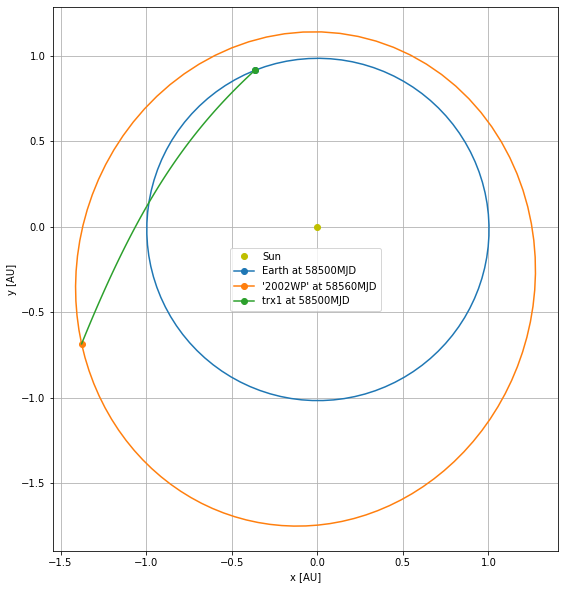

In [30]:
fig = plt.figure(figsize=(10,10))
plt.plot(0,0,'oy',label='Sun')
earth.plot(start=earliest_launch_date)
o.plot(start=earliest_launch_date+60,num=100)
o_trx.plot(earliest_launch_date, earliest_launch_date + 60) # plots trajectory
plt.legend()
plt.grid()
ax = plt.gca()
ax.set_aspect(1)

In [31]:
#fig = plt.figure(figsize=(6, 6))
#ax = fig.add_subplot(111, projection='3d')
#earth.plot(start=earliest_launch_date,num=100,dim=3)

In [32]:
dv1=v1-v_earth
print(dv1)
print(norm(dv1))

[-13.12528649 -26.75502027  13.97024827]
32.913099088158845


In [33]:
dv2=v2-v_ast
print(dv2)
print(norm(dv2))

[-23.773996   -25.22640239  12.72610466]
36.925980053535895


In [34]:
# for each launch
launch_step = 10
earliest_launch_date = 57023
latest_launch_date = 61041+10
earliest_launch_date = 58500
latest_launch_date = 59000

launch_dates = np.arange(earliest_launch_date, latest_launch_date, step=launch_step) # in MJD

launch_dates = np.arange(58676-50, 58676+50, step=launch_step) # in MJD

print(launch_dates)

tof_vals = np.arange(20,65,5)
print(tof_vals)

[58626 58636 58646 58656 58666 58676 58686 58696 58706 58716]
[20 25 30 35 40 45 50 55 60]


In [35]:
type(earth)

orbit.Orbit

In [36]:

vinf_max = 4.1  # threshold c3 [km/s]

assert len(asteroids) == 1436, "check number of asteroids"
   
# store number of times where izzo lambert did not converge
use_izzo = 0
use_bate = 0

ind = 0
for ld in launch_dates:
    for tof in tof_vals:
        for ast in asteroids:

            re, ve = earth.rv(epoch=ld)
            ra, va = ast.rv(epoch=ld+tof)
            try:
                v1, v2 = lambert_izzo(earth.mu, re, ra,tof=tof*day2s,M=0, return_='short')
                use_izzo += 1
            except:
                v1, v2 = lambert_bate(o.mu, r_earth, r_ast, tof=60*day2s, grade='pro')
                use_bate += 1
             
            vinf = norm(v1-ve)
            
            if vinf<vinf_max:
                
                print(f'{ind}: date: {ld}, tof: {tof}, ast: {ast}, \t vinf: {vinf:3.2e}')
                ind += 1


print(f'Number of times izzo-lambert failed: {use_bate} out of {use_bate+use_izzo}')


/Users/Devansh/Documents/GitHub/reGTOC04/jupyternotebooks/lambert_izzo.py:213: RuntimeWarning: invalid value encountered in double_scalars
  S_1 = (1- ll - x * eta)**0.5


0: date: 58626, tof: 20, ast: '2003LH', 	 vinf: 4.07e+00
1: date: 58626, tof: 55, ast: '2006WP127', 	 vinf: 3.69e+00
2: date: 58626, tof: 55, ast: '2005NE21', 	 vinf: 3.97e+00
3: date: 58636, tof: 55, ast: '141593', 	 vinf: 4.07e+00
4: date: 58636, tof: 60, ast: '141593', 	 vinf: 3.09e+00
5: date: 58636, tof: 60, ast: '2000QW7', 	 vinf: 4.02e+00
6: date: 58646, tof: 50, ast: '141593', 	 vinf: 3.52e+00
7: date: 58646, tof: 55, ast: '141593', 	 vinf: 2.53e+00
8: date: 58646, tof: 55, ast: '2000QW7', 	 vinf: 4.00e+00
9: date: 58646, tof: 55, ast: '2006QV89', 	 vinf: 3.78e+00
10: date: 58646, tof: 60, ast: '141593', 	 vinf: 1.79e+00
11: date: 58646, tof: 60, ast: '2000QW7', 	 vinf: 3.13e+00
12: date: 58646, tof: 60, ast: '2008SJ82', 	 vinf: 3.14e+00
13: date: 58656, tof: 45, ast: '141593', 	 vinf: 3.00e+00
14: date: 58656, tof: 50, ast: '2002JR100', 	 vinf: 4.10e+00
15: date: 58656, tof: 50, ast: '141593', 	 vinf: 2.17e+00
16: date: 58656, tof: 50, ast: '2008SJ82', 	 vinf: 4.07e+00
17: dat

138: date: 58696, tof: 45, ast: '2002JR100', 	 vinf: 2.94e+00
139: date: 58696, tof: 45, ast: '2004SA20', 	 vinf: 3.55e+00
140: date: 58696, tof: 45, ast: '2000QW7', 	 vinf: 1.06e+00
141: date: 58696, tof: 45, ast: '2008SJ82', 	 vinf: 3.97e+00
142: date: 58696, tof: 45, ast: '2006QV89', 	 vinf: 1.09e+00
143: date: 58696, tof: 50, ast: '2002JR100', 	 vinf: 3.11e+00
144: date: 58696, tof: 50, ast: '2006QV89', 	 vinf: 8.99e-01
145: date: 58696, tof: 55, ast: '2002JR100', 	 vinf: 3.26e+00
146: date: 58696, tof: 55, ast: '2004SA20', 	 vinf: 1.55e+00
147: date: 58696, tof: 55, ast: '2001TB', 	 vinf: 3.87e+00
148: date: 58696, tof: 55, ast: '2006QV89', 	 vinf: 8.53e-01
149: date: 58696, tof: 55, ast: '2007RQ12', 	 vinf: 1.85e+00
150: date: 58696, tof: 60, ast: '2002JR100', 	 vinf: 3.40e+00
151: date: 58696, tof: 60, ast: '2004SA20', 	 vinf: 2.45e+00
152: date: 58696, tof: 60, ast: '2000QW7', 	 vinf: 2.06e+00
153: date: 58696, tof: 60, ast: '2006QV89', 	 vinf: 8.86e-01
154: date: 58696, tof: 6

In [37]:
sys.getsizeof(asteroids)  # what is this doing?

131296